In [1]:
from fastcrypt_trial import FastCrypt
import matplotlib.pyplot as plt
import numpy as np
from time import time, sleep
import pickle

In [2]:
fc = FastCrypt()

In [3]:
keybits = '{:0128b}'.format(int.from_bytes(fc.secret_key,'big'))

In [4]:
for j in range(16):
    print(''.join([keybits[j + 16*i] for i in range(8)]))

01011100
10011101
00000101
00110000
11110101
01100000
01110101
11001111
00101001
11101110
11101111
11111111
01100010
10110010
01001000
11110100


'1' bits are fast, '0' bits are slow

In [5]:
msg = b'Hello,Example Message?!'*64

hexalp = "0123456789abcdef"
zerohx = '00000000'

timings = [[0 for _ in range(100)]] + [[0 for _ in range(40)] for _ in range(16*8)]

T0 = time()
for j in range(16*8):
    
    if j % 16 == 0:
        
        if j == 0:
            pass
        
        else:
            continue
    
    print(j, end='\r', flush=True)
    
    for i in range(len(timings[j])):
        
        timehex = zerohx

        t0 = time()
        fc.encrypt(msg, iv=bytes.fromhex( '0'*(j//16) + str(hexalp[j%16]) + '0'*(7-j//16) ))
        t1 = time()

        timings[j][i] = t1 - t0
        
T1 = time()
print('It took me {:.2f} seconds!'.format(T1-T0))

It took me 465.43 seconds!


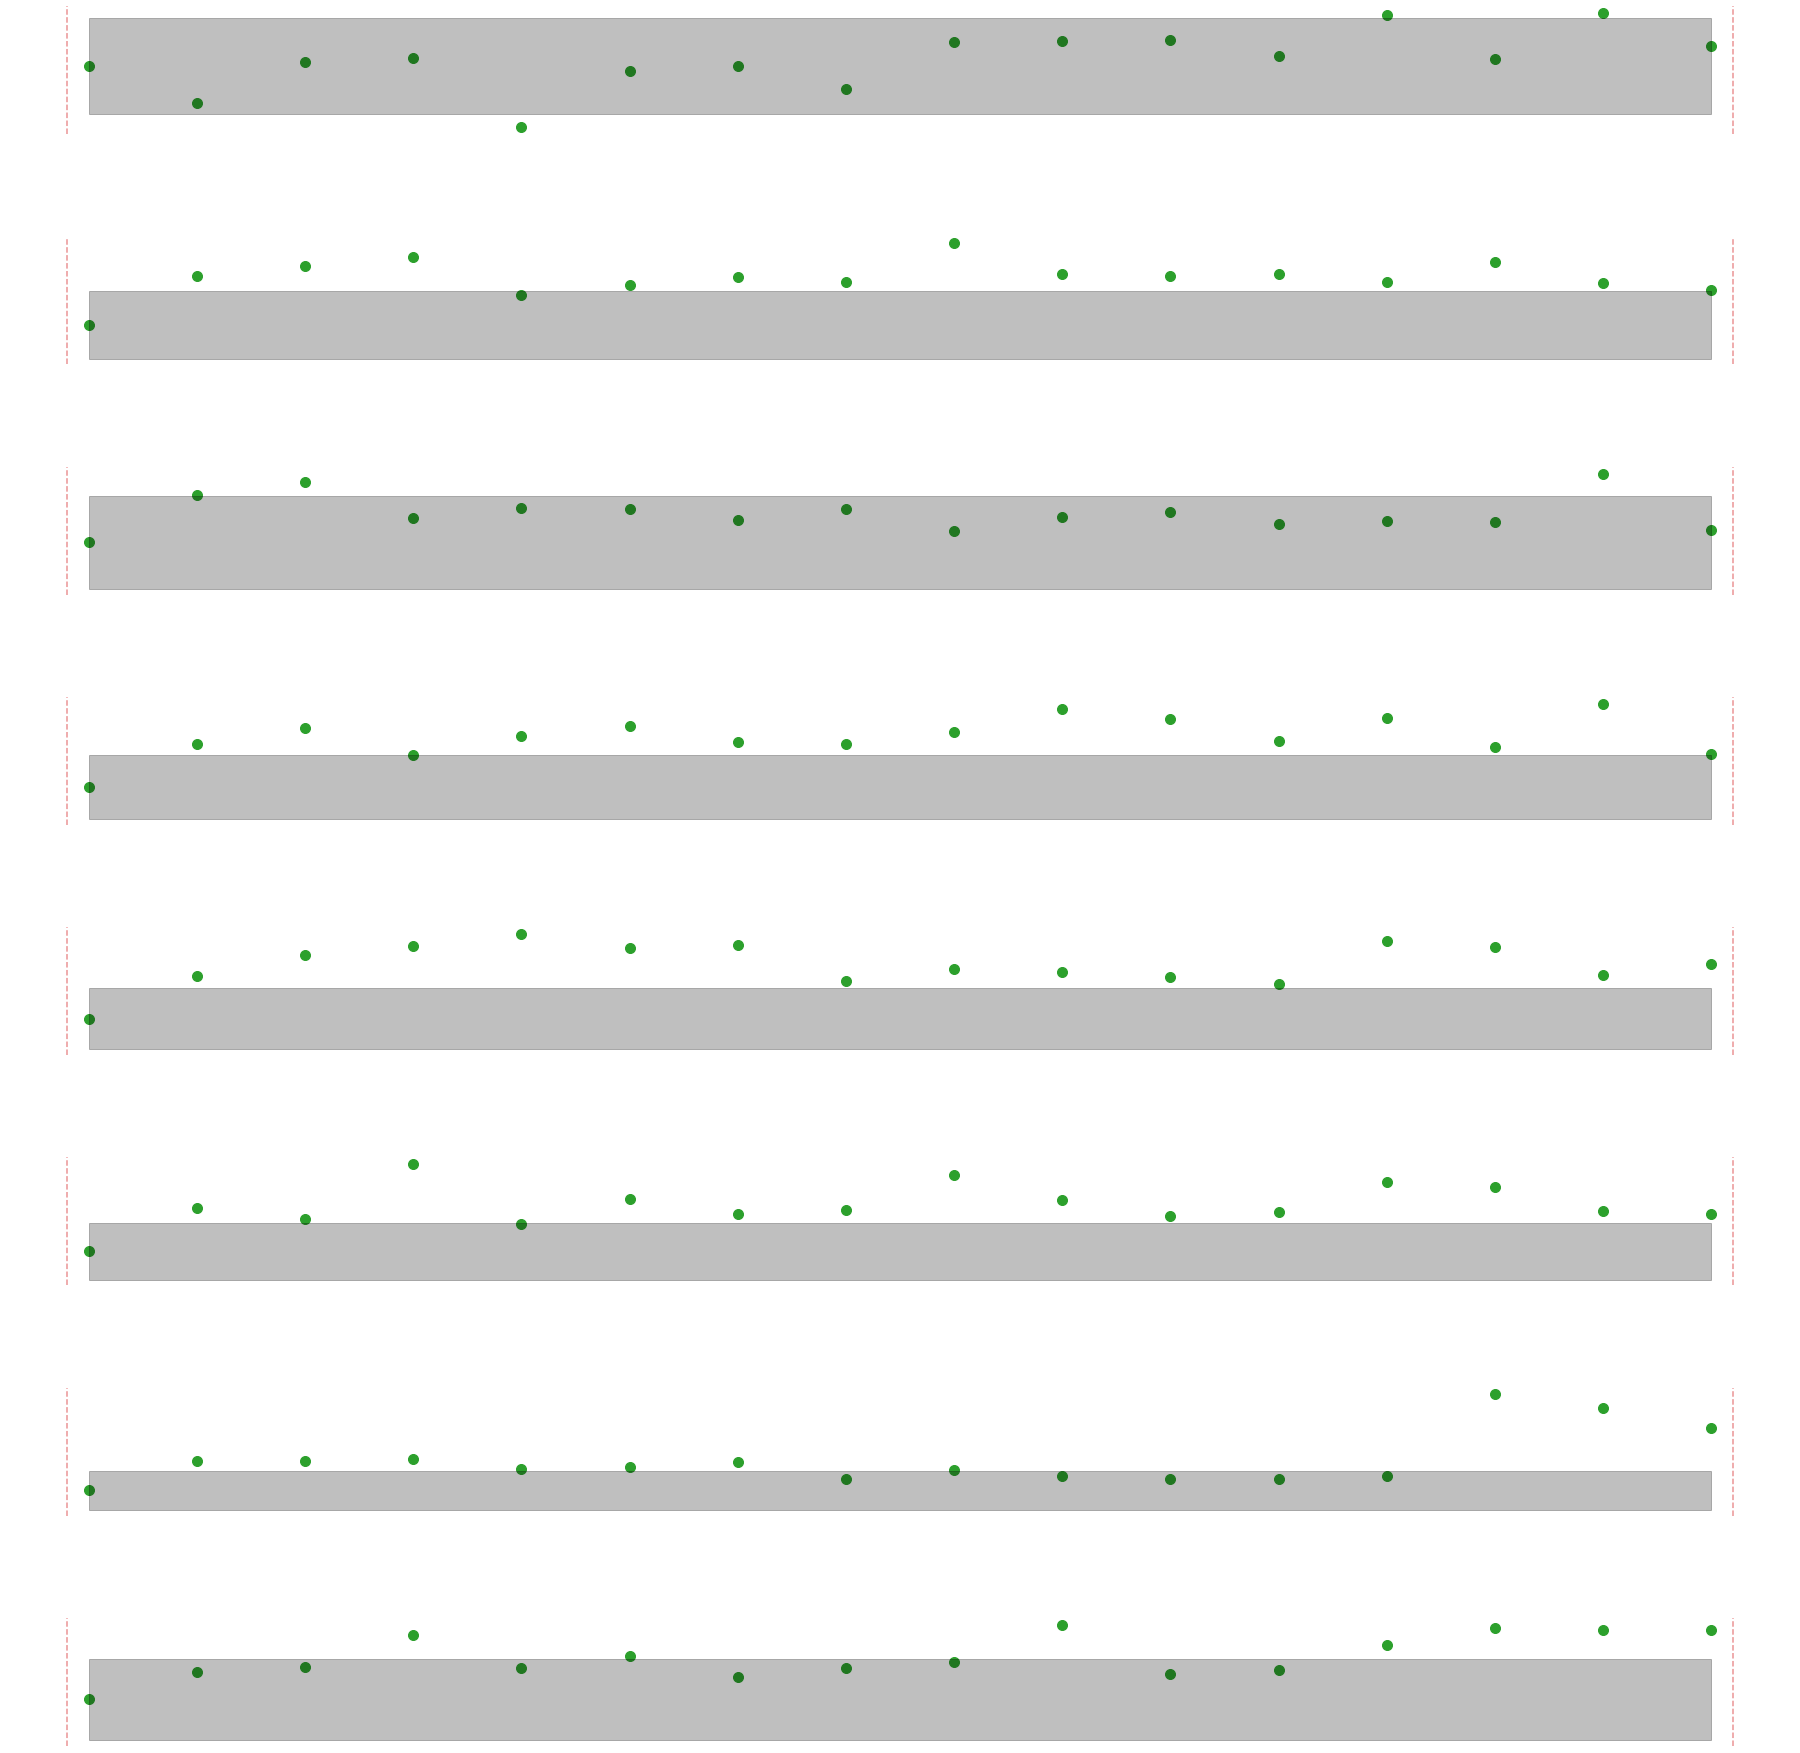

In [6]:
fig, axs = plt.subplots(8,1,figsize=(32,32))

base_mean = np.mean(timings[0])
base_sdev = np.std(timings[0])
adjusted_means = [np.mean(j)-base_mean if j[0] != 0 else 0 for j in timings]
adjusted_sdevs = [np.sqrt( np.std(j)**2 + base_sdev**2 ) if j[0] != 0 or j == timings[0] else 0 for j in timings]
relative_diff  = [adjusted_means[i] / adjusted_sdevs[i] if adjusted_sdevs[i] != 0 else 0 for i in range(len(adjusted_means))]

for i,ax in enumerate(axs):
    
#     y = adjusted_means[i*16:(i+1)*16]
#     x = range(len(y))
#     s = adjusted_sdevs[i*16:(i+1)*16]
#     ax.errorbar(x, y, yerr=s, ls='', marker='.', ms=20, c='tab:red')
    
    y = relative_diff[i*16:(i+1)*16]
    x = range(len(y))
    ax.scatter(x, y, s=100, c='tab:green')
    
    ax.fill_between(x, [-1 for _ in x], [1 for _ in x], color='black', alpha=0.25)
    ax.axvline(-.2, ls='--', c='tab:red', alpha=0.5)
    ax.axvline(15.2, ls='--', c='tab:red', alpha=0.5)
    ax.axis('off')
    
plt.subplots_adjust(hspace=.8)
plt.show()

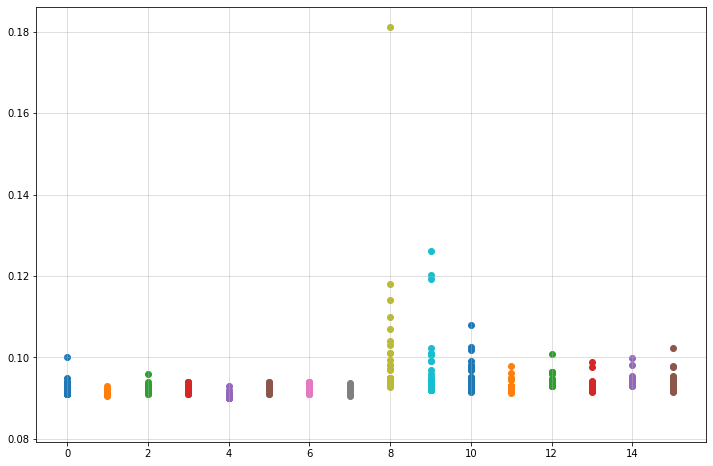

In [14]:
plt.figure(figsize=(12,8))

for k in range(16):
    
    plt.scatter([k for _ in timings[k]], timings[k])    

#plt.ylim(0.17,0.19)
plt.grid(alpha=0.5)
plt.show()

In [13]:
list(zip(*timings))

[(0.09502100944519043,
  0.09202098846435547,
  0.09302067756652832,
  0.09302234649658203,
  0.0910184383392334,
  0.09202075004577637,
  0.09202075004577637,
  0.09302163124084473,
  0.09501862525939941,
  0.09202027320861816,
  0.0939321517944336,
  0.09485101699829102,
  0.09300470352172852,
  0.0920414924621582,
  0.09503531455993652,
  0.0953528881072998,
  0,
  0.09647393226623535,
  0.09628772735595703,
  0.09653306007385254,
  0.09436321258544922,
  0.09478569030761719,
  0.09554100036621094,
  0.0946044921875,
  0.0960228443145752,
  0.0950162410736084,
  0.09540653228759766,
  0.0949552059173584,
  0.09501123428344727,
  0.09632492065429688,
  0.0970602035522461,
  0.09551525115966797,
  0,
  0.09664344787597656,
  0.09592413902282715,
  0.09354305267333984,
  0.09322428703308105,
  0.09295344352722168,
  0.09339070320129395,
  0.09504914283752441,
  0.09481549263000488,
  0.09370636940002441,
  0.09561824798583984,
  0.10503029823303223,
  0.09402132034301758,
  0.096255064

ValueError: shape mismatch: objects cannot be broadcast to a single shape

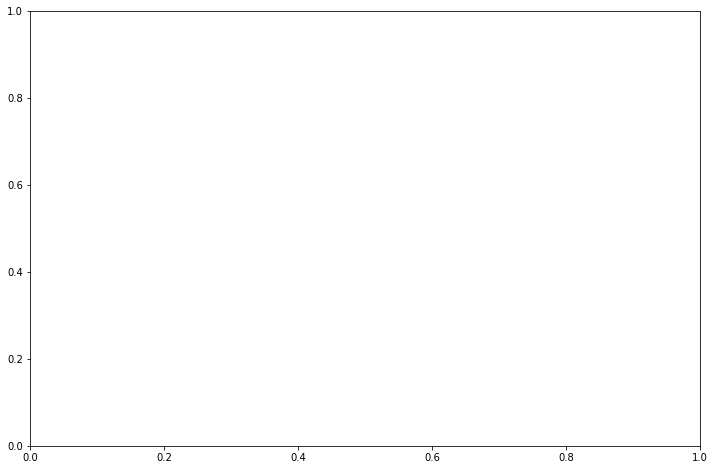

In [9]:
plt.figure(figsize=(12,8))

means = [np.mean(i) for i in timings]
sdevs = [np.std(i)  for i in timings]

plt.errorbar(range(16), means, yerr=sdevs, ls='', marker='.', ms=20, c='black')

plt.grid(alpha=0.5)
plt.show()

In [15]:
msg = b'Hello,Example Message?!'*32

hexalp = "0123456789abcdef"
zerohx = '00000000'

timings = [[0. for _ in range(100)] for _ in range(16*8)]

T0 = time()
for j in range(16*8):
    
    if j % 16 == 0:
        
        if j == 0:
            pass
        
        else:
            continue
    
    print(j, end='\r', flush=True)
    
    for i in range(len(timings[j])):
        
        timehex = zerohx

        t0 = time()
        fc.encrypt(msg, iv=bytes.fromhex( '0'*(j//16) + str(hexalp[j%16]) + '0'*(7-j//16) ))
        t1 = time()
        
        t2 = time()
        fc.encrypt(msg, iv=bytes.fromhex("00000000"))
        t3 = time()

        timings[j][i] = (t1 - t0) - (t3 - t2)
        
T1 = time()
print('It took me {:.2f} seconds!'.format(T1-T0))

It took me 1176.19 seconds!


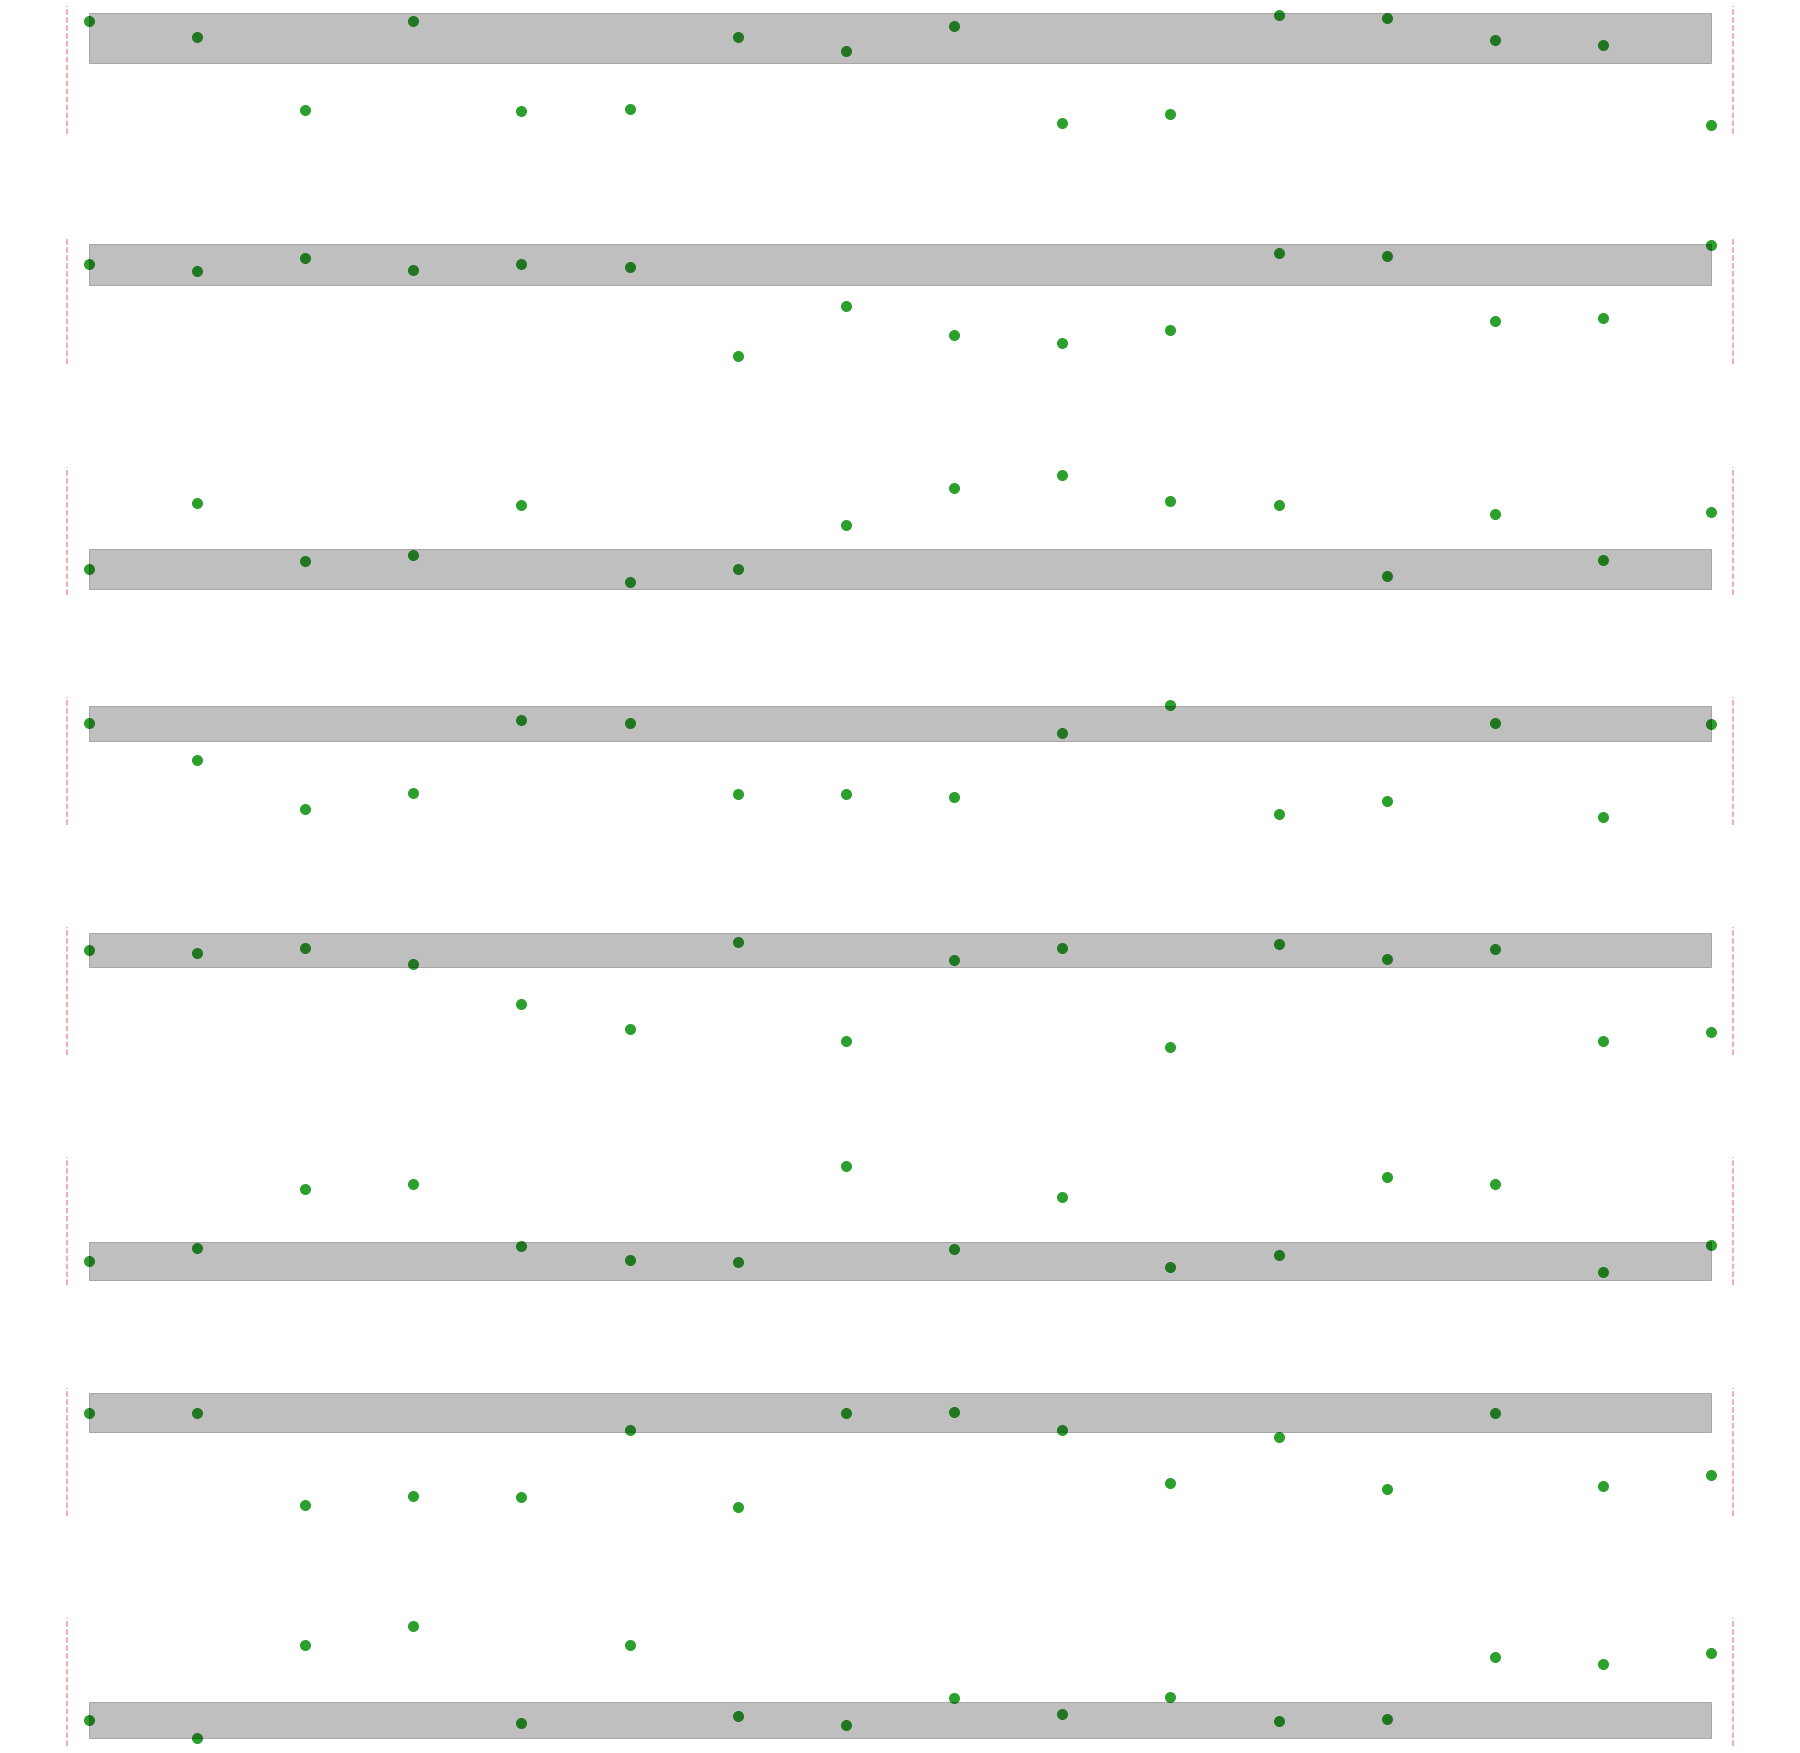

In [5]:
fig, axs = plt.subplots(8,1,figsize=(32,32))

adjusted_means = [np.mean(j) if j[0] != 0 else 0 for j in timings]
adjusted_sdevs = [np.std(j)  if j[0] != 0 else 0 for j in timings]
relative_diff  = [adjusted_means[i] / adjusted_sdevs[i] if adjusted_sdevs[i] != 0 else 0 for i in range(len(adjusted_means))]

LIMIT = 0.2

for i,ax in enumerate(axs):
    
    y = relative_diff[i*16:(i+1)*16]
    x = range(len(y))
    ax.scatter(x, y, s=100, c='tab:green')
    
    ax.fill_between(x, [-LIMIT for _ in x], [LIMIT for _ in x], color='black', alpha=0.25)
    ax.axvline(-.2, ls='--', c='tab:red', alpha=0.5)
    ax.axvline(15.2, ls='--', c='tab:red', alpha=0.5)
    ax.axis('off')
    
plt.subplots_adjust(hspace=.8)
plt.show()

In [10]:
adjusted_means = [np.mean(j) if j[0] != 0 else 0 for j in timings]
adjusted_sdevs = [np.std(j)  if j[0] != 0 else 0 for j in timings]
relative_diff  = [adjusted_means[i] / adjusted_sdevs[i] if adjusted_sdevs[i] != 0 else 0 for i in range(len(adjusted_means))]

recovered_key = [(0,0) for _ in range(16*8)]
lst = [sum(relative_diff[i*16:(i+1)*16]) for i in range(8)]
swp = { '1' : '0', '0' : '1' }
for i in range(8):
    if lst[i] < 0:
        recovered_key[i*16] = ('0', abs(lst[i])/8)
    else:
        recovered_key[i*16] = ('1', abs(lst[i])/8)
    for j in range(1,16):
        prob = abs(relative_diff[i*16 + j])
        if prob < 0.25:
            recovered_key[i*16 + j] = (recovered_key[i*16][0], 1 - prob)
        else:
            recovered_key[i*16 + j] = (swp[recovered_key[i*16][0]], prob)
            
#print(recovered_key)
recbits, recprobs = ''.join(list(zip(*recovered_key))[0]), list(zip(*recovered_key))[1]
bruteforce_limit = sorted(recprobs)[24]
print(recbits)
print(keybits)
print(''.join(['.' if recbits[i] == keybits[i] else 'x' for i in range(128)]), sum([0 if recbits[i] == keybits[i] else 1 for i in range(128)]))
print(''.join(['|' if recprobs[i] < bruteforce_limit else '.' for i in range(128)]))

00101100011000010000001111100110101101100000101001110011100110100000110100100011110011101011001100111010001010111100101111011000
00101100011000010000001111100110101101100000101001110011100110100000110100100011110011101011001100111010001010111100101111011000
................................................................................................................................ 0
|.|.||....|.....|......|..|..||..|..|..|...|.|.|.|..................|...........|........|.....................||.........|...|.


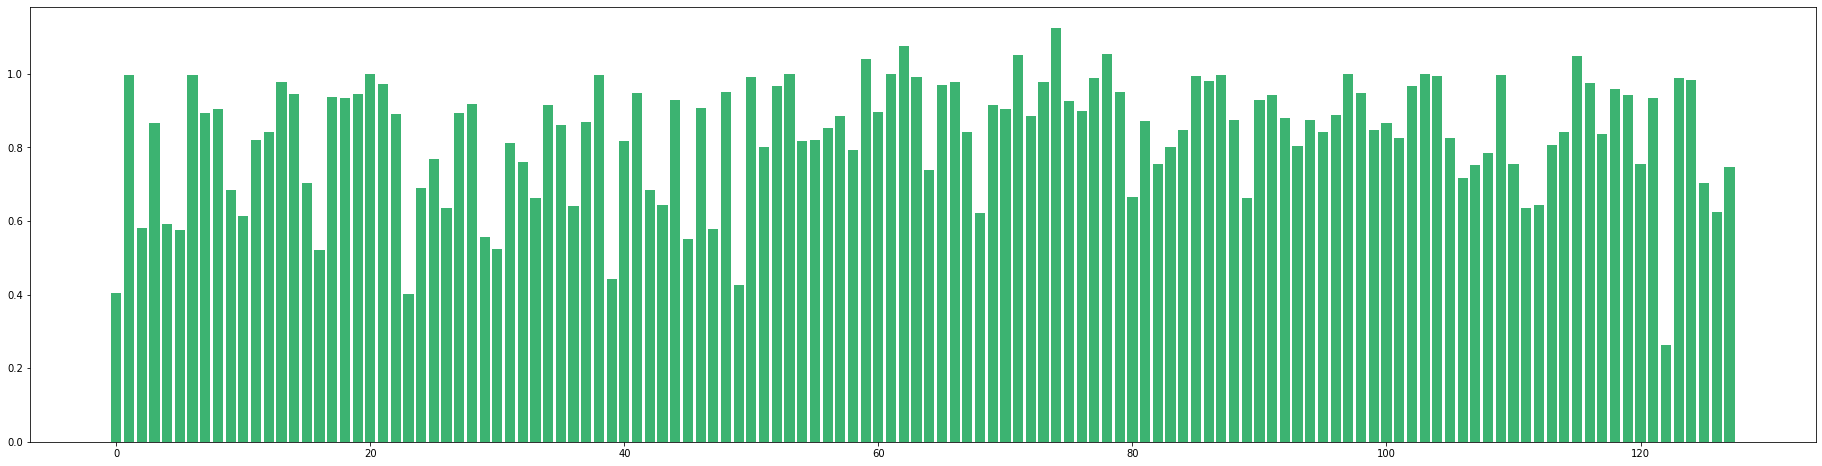

In [11]:
plt.figure(figsize=(32,8))
plt.bar(range(128), [recprobs[i] if recbits[i] == keybits[i] else 0 for i in range(128)], color='mediumseagreen')
plt.bar(range(128), [recprobs[i] if recbits[i] != keybits[i] else 0 for i in range(128)], color='firebrick')
plt.show()

In [8]:
mismatch_lst = []
nonbf_mismatch = []
prob_limit = [0.01*i for i in range(1,101)]

for LIM in prob_limit:

    recovered_key = [(0,0) for _ in range(16*8)]
    lst = [sum(relative_diff[i*16:(i+1)*16]) for i in range(8)]
    swp = { '1' : '0', '0' : '1' }
    
    for i in range(8):
        
        if lst[i] < 0:
            recovered_key[i*16] = ('0', abs(lst[i])/8)
        else:
            recovered_key[i*16] = ('1', abs(lst[i])/8)
            
        for j in range(1,16):
            
            prob = abs(relative_diff[i*16 + j])
            
            if prob < LIM:
                recovered_key[i*16 + j] = (recovered_key[i*16][0], 1 - prob)
            else:
                recovered_key[i*16 + j] = (swp[recovered_key[i*16][0]], prob)

    recbits, recprobs = ''.join(list(zip(*recovered_key))[0]), list(zip(*recovered_key))[1]
    bruteforce_limit = sorted(recprobs)[24] # 3-byte limit
    
    mismatch_lst.append(sum([0 if recbits[i] == keybits[i] else 1 for i in range(128)]))
    nonbf_mismatch.append(sum([0 if recbits[i] == keybits[i] or recprobs[i] < bruteforce_limit else 1 for i in range(128)]))


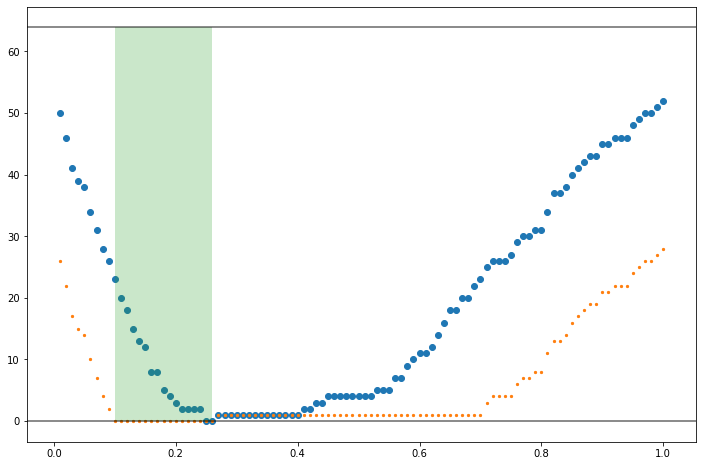

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(prob_limit, mismatch_lst)
plt.scatter(prob_limit, nonbf_mismatch, s=5)
try:
    plt.fill_betweenx([0,64], [prob_limit[nonbf_mismatch.index(0)]]*2, [prob_limit[-(nonbf_mismatch[::-1]).index(0)-1]]*2, alpha=0.25)
except:
    pass
plt.axhline(0, c='black', alpha=0.6)
plt.axhline(64, c='black', alpha=0.6)
plt.show()

In [158]:
data_dic = {
    "keybits" : keybits,
    "timings" : timings,
    "adjusted_means" : adjusted_means,
    "adjusted_sdevs" : adjusted_sdevs,
    "relative_diffs" : relative_diff,
    "prob_limit" : prob_limit,
    "mismatches" : mismatch_lst
}
# with open("data_run_1.pickle","wb") as f:
#     f.write(pickle.dumps(data_dic))
#     f.close()

In [159]:
with open("data_run_1.pickle","rb") as f:
    DATA = pickle.loads(f.read())
    f.close()

In [160]:
DATA

{'keybits': '01110011011010011101010001000010110001000001110011010011011011111110101011011010101100100100011101101110010110000011010000010011',
 'timings': [[0.0,
   -0.00011086463928222656,
   2.384185791015625e-07,
   7.128715515136719e-05,
   0.00018930435180664062,
   0.00031375885009765625,
   -5.7220458984375e-05,
   0.00015783309936523438,
   2.384185791015625e-07,
   -0.0010018348693847656,
   -9.5367431640625e-07,
   7.152557373046875e-07,
   -0.0010309219360351562,
   0.0009980201721191406,
   0.00099945068359375,
   0.0010845661163330078,
   -0.0003788471221923828,
   -0.0010859966278076172,
   4.8160552978515625e-05,
   -0.0009999275207519531,
   -0.001046895980834961,
   -5.245208740234375e-06,
   0.000499725341796875,
   -0.0009069442749023438,
   -0.001001119613647461,
   0.00015592575073242188,
   0.0002624988555908203,
   -0.0004074573516845703,
   -1.430511474609375e-06,
   0.00044345855712890625,
   0.0010006427764892578,
   -0.0001068115234375,
   0.0006201267242431